<a href="https://colab.research.google.com/github/rj21959/CodeAlpha_project/blob/main/CodeAlpha__Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (2).zip to archive (2) (3).zip
✅ Extracted files: ['Unemployment_Rate_upto_11_2020.csv', 'Unemployment in India.csv']

📄 Columns in Dataset 1: ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']
📄 Columns in Dataset 2: ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']

🔍 Missing Values:
 Region                                      28
Date                                        28
Frequency                                   28
Unemployment Rate                           28
Estimated Employed                          28
Estimated Labour Participation Rate (%)     28
Area                                       295
Region.1                                   768
longitude                                  768
latitude                                   768
dtype: in

,Date,Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,1007,1007.000000,1.007000e+03,1007.000000,267.000000,267.000000
mean,2020-01-31 06:06:04.647467776,11.906991,8.996209e+06,42.378620,22.826048,80.532425
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000,10.850500,71.192400
25%,2019-09-30 00:00:00,4.685000,1.639125e+06,37.835000,18.112400,76.085600
50%,2020-01-31 00:00:00,8.890000,5.543380e+06,40.880000,23.610200,79.019300
75%,2020-05-31 00:00:00,16.125000,1.287115e+07,45.315000,27.278400,85.279900
max,2020-10-31 00:00:00,76.740000,5.943376e+07,72.570000,33.778200,92.937600
std,NaN,10.739549,1.020784e+07,8.048542,6.270731,5.831738


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



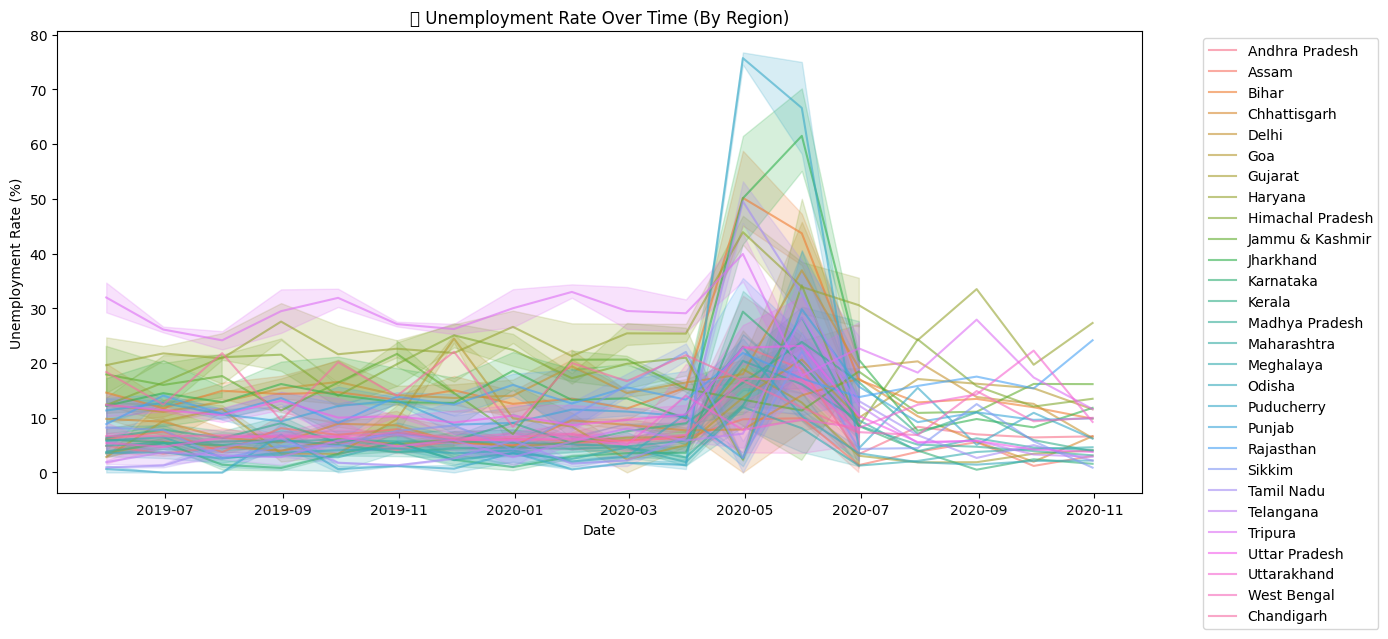

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.



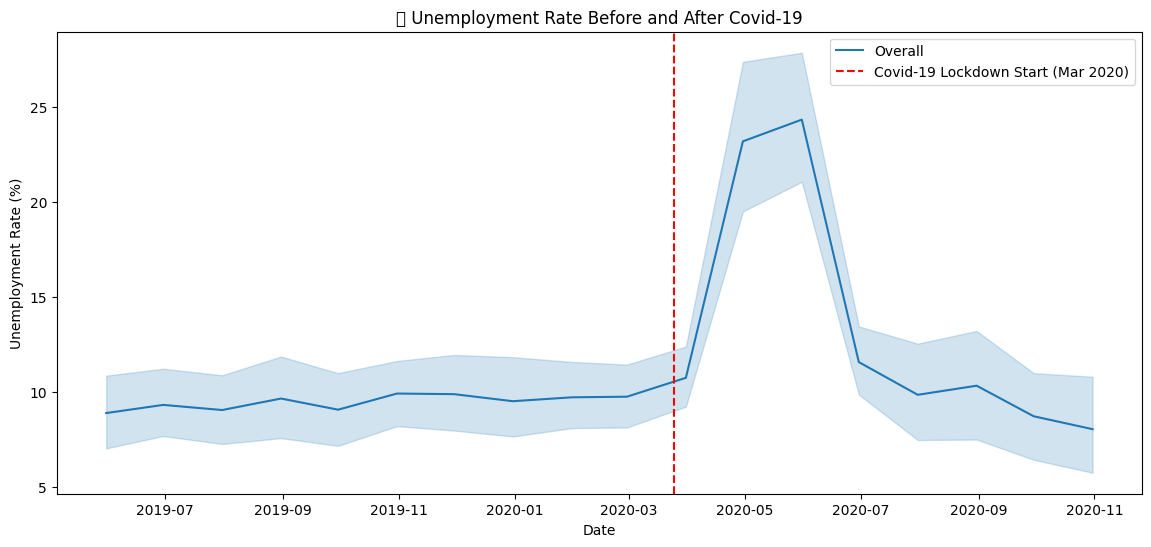

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



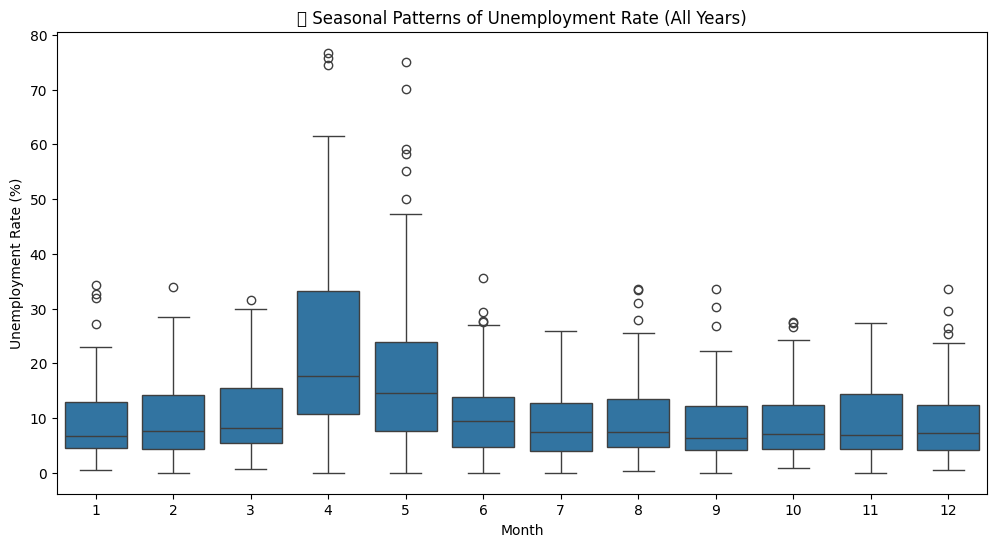

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.




📊 Region-wise Unemployment Trends:


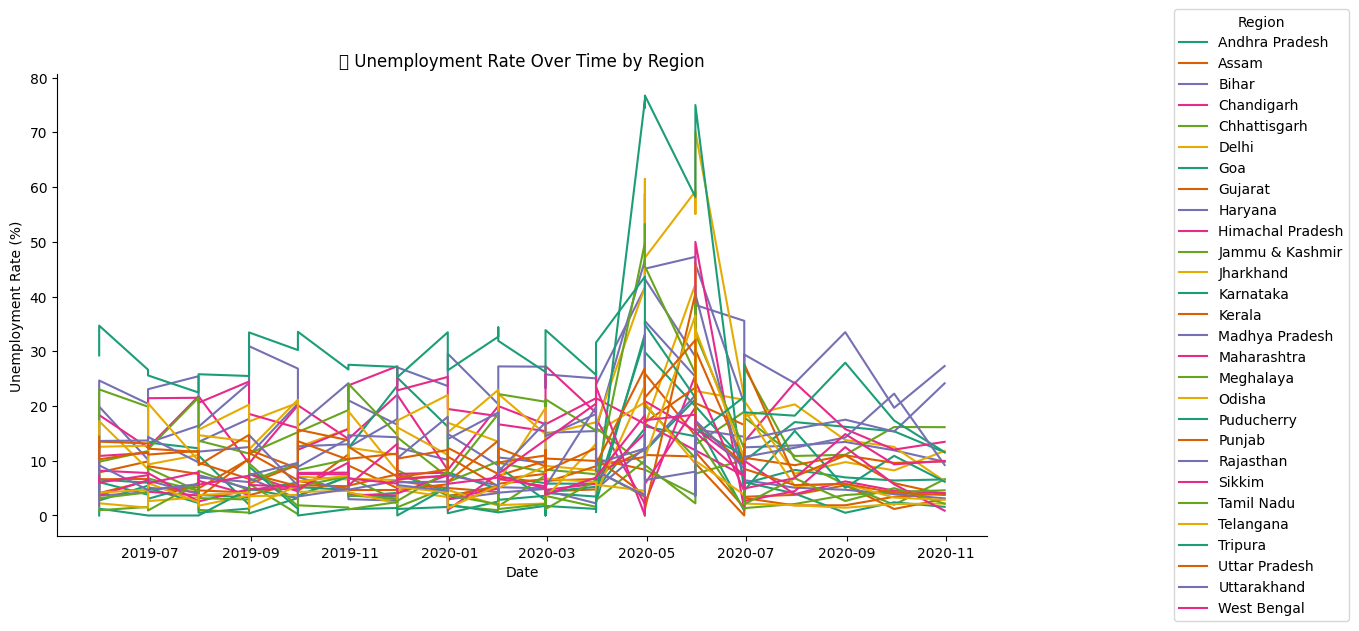

In [4]:
#Installing necessary libraries
!pip install pandas matplotlib seaborn plotly

#Importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import zipfile
import os

#Uploading ZIP file
from google.colab import files
uploaded = files.upload()

#Unzip the uploaded dataset
import io
zip_file = list(uploaded.keys())[0]  # Get the uploaded zip file name
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('data')  # Extract to 'data' folder

#List extracted files
print("Extracted files:", os.listdir('data'))

#Load Data
df1 = pd.read_csv('data/Unemployment in India.csv')
df2 = pd.read_csv('data/Unemployment_Rate_upto_11_2020.csv')

#Check column names
print("\n Columns in Dataset 1:", df1.columns.tolist())
print("Columns in Dataset 2:", df2.columns.tolist())

#Clean column names: remove leading/trailing spaces
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

#Check if 'Date' column exists
if 'Date' not in df1.columns or 'Date' not in df2.columns:
    raise ValueError("'Date' column not found in one of the datasets. Check column names above.")

#Convert Date to datetime
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True, errors='coerce')

#Standardize column names
df1.rename(columns={'Estimated Unemployment Rate (%)': 'Unemployment Rate'}, inplace=True)
df2.rename(columns={'Estimated Unemployment Rate (%)': 'Unemployment Rate'}, inplace=True)

#Merge datasets
combined_df = pd.concat([df1, df2], ignore_index=True)

#Check for missing values
print("\n Missing Values:\n", combined_df.isnull().sum())

#Drop rows where 'Date' or 'Unemployment Rate' is missing
combined_df.dropna(subset=['Date', 'Unemployment Rate'], inplace=True)

#Summary Statistics
print("\n Summary Statistics:")
display(combined_df.describe())

#Trend Analysis: Unemployment Rate Over Time
plt.figure(figsize=(14,6))
sns.lineplot(data=combined_df, x='Date', y='Unemployment Rate', hue='Region', alpha=0.6)
plt.title('Unemployment Rate Over Time (By Region)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Covid-19 Impact (Highlight 2020 onwards)
plt.figure(figsize=(14,6))
combined_df['Year'] = combined_df['Date'].dt.year
sns.lineplot(data=combined_df, x='Date', y='Unemployment Rate', label='Overall')
plt.axvline(pd.to_datetime('2020-03-25'), color='red', linestyle='--', label='Covid-19 Lockdown Start (Mar 2020)')
plt.title('Unemployment Rate Before and After Covid-19')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.legend()
plt.show()

#Seasonal Patterns
combined_df['Month'] = combined_df['Date'].dt.month
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Unemployment Rate', data=combined_df)
plt.title('Seasonal Patterns of Unemployment Rate (All Years)')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.show()

#Regional Map Visualization
if 'latitude' in df2.columns and 'longitude' in df2.columns:
    fig = px.scatter_geo(
        df2,
        lat='latitude',
        lon='longitude',
        color='Unemployment Rate',
        size='Unemployment Rate',
        hover_name='Region',
        size_max=30,
        title='Regional Unemployment Rate (Post-Covid)'
    )
    fig
    #Custom Region-wise Time Series Plot (Fixed Version)
print("\n Region-wise Unemployment Trends:")

# Ensure Date is datetime and clean
combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce')
combined_df = combined_df.dropna(subset=['Date'])  # Drop rows with invalid dates

# Sort by Date
combined_df = combined_df.sort_values('Date')

# Plot function
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Date']
    ys = series['Unemployment Rate']
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))
for i, (region_name, series) in enumerate(combined_df.groupby('Region')):
    _plot_series(series, region_name, i)

fig.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('📈 Unemployment Rate Over Time by Region')
plt.show()

